<a href="https://colab.research.google.com/github/Erandi44/image_classification/blob/main/image_classifiction_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here we will build a binary image classification (cat or dog) model using Convolutional Neural Network (CNN) as implemented in Keras.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

## **Load Dataset**


In [2]:
X_train = np.loadtxt('/content/drive/MyDrive/image_data/cat-&-dog/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/image_data/cat-&-dog/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/image_data/cat-&-dog/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/image_data/cat-&-dog/labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


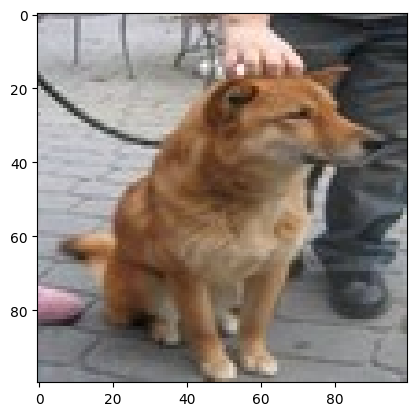

In [7]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## **Model**

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 22s 638ms/step - loss: 0.7164 - accuracy: 0.4945
Epoch 2/5
32/32 [==============================] - 22s 697ms/step - loss: 0.6925 - accuracy: 0.5295
Epoch 3/5
32/32 [==============================] - 20s 640ms/step - loss: 0.6718 - accuracy: 0.6215
Epoch 4/5
32/32 [==============================] - 22s 704ms/step - loss: 0.6420 - accuracy: 0.6265
Epoch 5/5
32/32 [==============================] - 22s 705ms/step - loss: 0.5849 - accuracy: 0.7025


## **Evaluation**

In [13]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 76ms/step - loss: 0.6137 - accuracy: 0.6750


[0.6137312054634094, 0.675000011920929]

## **Predictions**

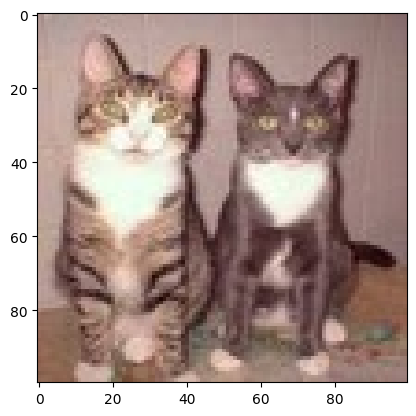

1/1 [==============================] - 0s 172ms/step
Model says it is a : cat


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Model says it is a :", pred)